In [1]:
!nvidia-smi

Thu Jul 13 10:25:13 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   44C    P8    11W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [2]:
import os
from google.colab import drive

drive.mount('/content/drive', force_remount = True)

Mounted at /content/drive


In [3]:
# !pip install ultralytics

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 628.0/628.0 kB 12.7 MB/s eta 0:00:00


In [4]:
import ultralytics
from ultralytics import YOLO
import random
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from PIL import Image

In [5]:
os.chdir('/content/drive/MyDrive/license_plates_detection')

In [6]:
model = YOLO('yolov8s.pt')

In [7]:
def plot_images_with_bounding_boxes(image_folder, annotation_folder, class_names, num_images=9):
    # Get the list of image files
    image_files = os.listdir(image_folder)

    # Randomly select num_images files
    selected_files = random.sample(image_files, min(num_images, len(image_files)))

    # Create a new figure for plotting
    fig, axes = plt.subplots(nrows=3, ncols=3, figsize=(15, 15))
    # fig.tight_layout()

    # Initialize the grid counters
    rows, cols = 3, 3
    grid_counter = 0

    for image_file, ax in zip(selected_files, axes.flat):
        # Load the image
        image_path = os.path.join(image_folder, image_file)
        image = Image.open(image_path)

        # Load the corresponding annotation file
        annotation_file = os.path.splitext(image_file)[0] + '.txt'
        annotation_path = os.path.join(annotation_folder, annotation_file)

        # Check if the annotation file exists
        if os.path.exists(annotation_path):
            # Read the bounding box annotations
            with open(annotation_path, 'r') as f:
                annotations = f.readlines()

            # Plot the image
            ax.imshow(image)

            # Plot bounding boxes on the image
            for annotation in annotations:
                class_id, x, y, width, height = map(float, annotation.strip().split())
                x1 = (x - width / 2) * image.width
                y1 = (y - height / 2) * image.height
                box_width = width * image.width
                box_height = height * image.height

                # Create a rectangle patch for the bounding box
                rect = patches.Rectangle((x1, y1), box_width, box_height, linewidth=2, edgecolor='g', facecolor='none')
                ax.add_patch(rect)

                # Add the class label near the bounding box
                class_name = class_names[int(class_id)]
                ax.text(x1, y1 - 10, class_name, fontsize=8, color='g', weight='bold', va='center', ha='center',
                        bbox=dict(facecolor='white', edgecolor='none', alpha=0.7))

        # Remove ticks and labels
        ax.axis('off')

        # Increment the grid counter
        grid_counter += 1

        # Break if the grid limit is reached
        if grid_counter >= rows * cols:
            break

    # Show the plot
    plt.show()

In [8]:
train_image_path = '/content/drive/MyDrive/license_plates_detection/images/train'
train_label_path = '/content/drive/MyDrive/license_plates_detection/labels/train'

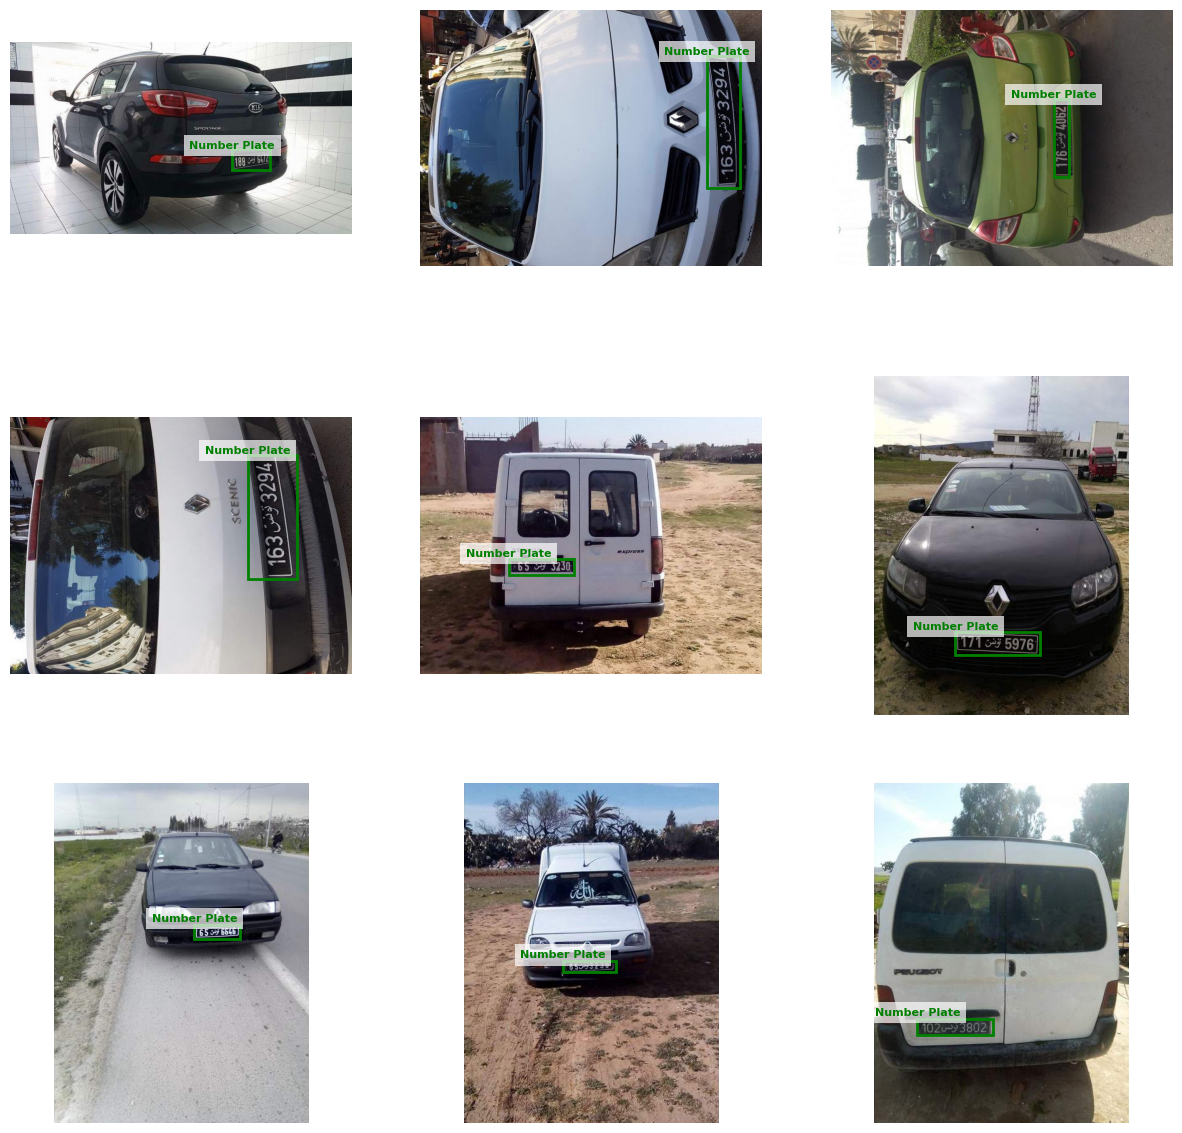

In [9]:
plot_images_with_bounding_boxes(image_folder=train_image_path, annotation_folder = train_label_path, class_names = ['Number Plate'])

In [10]:
pwd

'/content/drive/MyDrive/license_plates_detection'

In [11]:
# # Write config.yaml file
# config_file_ = open('config.yaml', 'w')
# config_file_.write("""path: /content/drive/MyDrive/license_plates_detection
# train: images/train
# val: images/val

# names:
#   0: Number Plate""")
# config_file_.close()

In [ ]:
# Lets train
model.train(
    data = 'config.yaml',
    epochs = 100,
    batch = 16,
    imgsz = 640,
    patience = 35
)

Ultralytics YOLOv8.0.133 🚀 Python-3.10.12 torch-2.0.1+cu118 CUDA:0 (Tesla T4, 15102MiB)
yolo/engine/trainer: task=detect, mode=train, model=yolov8s.pt, data=config.yaml, epochs=100, patience=35, batch=16, imgsz=640, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=None, exist_ok=False, pretrained=True, optimizer=auto, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=False, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, show=False, save_txt=False, save_conf=False, save_crop=False, show_labels=True, show_conf=True, vid_stride=1, line_width=None, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, boxes=True, format=torchscript, keras=False, optimize=False, int8=False, dynamic=False, simpl

In [13]:
%load_ext tensorboard
%tensorboard --logdir runs/detect/train2

56.25